<a href="https://colab.research.google.com/github/janduymonroe/projetoDIO/blob/master/An%C3%A1lise_Dados_Inclus%C3%A3o_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extração dos dados


In [524]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [470]:
#Atribuindo os caminhos dos diretórios a variáveis
#Os arquivos tratados podem ser baixados no link 
#https://drive.google.com/drive/folders/1cK39kp8NiuhfUy6x0nqPbrinyQMhNP4e?usp=sharing

url2016 = "/content/drive/MyDrive/ProjetoDIO - Analise ENEM/enem_2016_tea.csv"
url2017 = "/content/drive/MyDrive/ProjetoDIO - Analise ENEM/enem_2017_tea.csv"
url2018 = "/content/drive/MyDrive/ProjetoDIO - Analise ENEM/enem_2018_tea.csv"
url2019 = "/content/drive/MyDrive/ProjetoDIO - Analise ENEM/enem_2019_tea.csv"

In [471]:
#Passando os arquivos para variáveis 

df2016 = pd.read_csv(url2016, index_col=0)
df2017 = pd.read_csv(url2017, index_col=0)
df2018 = pd.read_csv(url2018, index_col=0)
df2019 = pd.read_csv(url2019, index_col=0)

In [472]:
#df2017 = df2017.drop('IN_INSCRICAO')
df2017

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2678,2017,Maringá,PR,38.0,F,0.0,1,1,Arapoti,PR,2,0,2,NaN,0,41024060.0,Maringá,PR,2.0,1.0,1.0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,Alegre,ES,0.0,0.0,0.0,0.0,NaN,A,A,A,A,1.0,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
5454,2017,Serra,ES,22.0,F,0.0,3,1,Fortaleza,CE,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Vitória,ES,1.0,1.0,1.0,1.0,1.0,E,F,D,D,6.0,I,A,E,E,C,A,C,C,D,A,C,A,B,E,B,B,E,B,E,B,A,D
13088,2017,Ipaporanga,CE,17.0,M,0.0,3,1,Crateús,CE,2,0,2,1.0,0,23217510.0,Ipaporanga,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Crateús,CE,0.0,0.0,0.0,0.0,NaN,B,B,A,A,5.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,B,A
22701,2017,Recife,PE,17.0,M,0.0,1,1,Recife,PE,2,0,3,1.0,0,26197405.0,Recife,PE,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Recife,PE,1.0,1.0,1.0,1.0,1.0,G,G,E,E,4.0,Q,D,E,D,B,A,B,B,B,A,B,A,B,E,B,B,E,B,E,B,B,D
42205,2017,Rio de Janeiro,RJ,18.0,M,0.0,1,1,Rio de Janeiro,RJ,2,0,2,1.0,0,33079374.0,Rio de Janeiro,RJ,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Rio de Janeiro,RJ,1.0,1.0,1.0,1.0,1.0,E,E,B,B,2.0,C,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,B,B,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690680,2017,Rio de Janeiro,RJ,24.0,M,0.0,1,1,Rio de Janeiro,RJ,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,Rio de Janeiro,RJ,1.0,1.0,1.0,1.0,1.0,F,B,D,B,2.0,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,C,A,B,B,A,A
6709460,2017,Floriano,PI,18.0,M,0.0,3,1,Floriano,PI,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,Floriano,PI,1.0,1.0,1.0,1.0,6.0,G,G,D,E,2.0,E,A,C,C,B,A,B,A,B,A,A,A,A,B,B,A,B,A,B,B,C,E
6711032,2017,Franco da Rocha,SP,22.0,M,0.0,3,1,Franco da Rocha,SP,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Franco da Rocha,SP,1.0,1.0,1.0,1.0,1.0,C,E,D,B,4.0,F,A,B,B,B,A,B,B,B,A,B,A,B,C,B,A,D,B,B,B,A,A
6718453,2017,Rio de Janeiro,RJ,19.0,M,0.0,3,1,Rio de Janeiro,RJ,2,0,2,1.0,0,33071594.0,Rio de Janeiro,RJ,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Rio de Janeiro,RJ,0.0,0.0,0.0,0.0,NaN,E,E,D,D,4.0,F,A,D,C,B,A,B,B,B,A,A,A,A,C,B,B,C,B,C,B,B,A


In [473]:
#Como iremos unir os dataframe precisamos verificar se as colunas são iguais


colunas2016 = df2016.columns
colunas2017 = df2017.columns
colunas2018 = df2018.columns
colunas2019 = df2019.columns

#Vamos verificar o tamanho de cada lista para escolhermos a lista com menos colunas
ano = 2016
for tamanho in [colunas2016, colunas2017, colunas2018, colunas2019]:
  print(f"Colunas do ano de {ano}: {len(tamanho)}")
  ano += 1

Colunas do ano de 2016: 101
Colunas do ano de 2017: 72
Colunas do ano de 2018: 72
Colunas do ano de 2019: 70


In [474]:
#Retirar as colunas que não são coincidentes com o ano de menor numero de colunas

col_2016_exc = [coluna for coluna in colunas2016 if coluna not in colunas2019]
col_2017_exc = [coluna for coluna in colunas2017 if coluna not in colunas2019]
col_2018_exc = [coluna for coluna in colunas2018 if coluna not in colunas2019]   

for colunas in col_2016_exc:
  df2016 = df2016.drop(colunas, axis=1)

for colunas in col_2017_exc:
  df2017 = df2017.drop(colunas, axis=1)

for colunas in col_2018_exc:
  df2018 = df2018.drop(colunas, axis=1)

In [475]:
data_frames = [df2016, df2017, df2018, df2019]

df = pd.concat(data_frames)

df.columns

Index(['NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
       'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE',
       'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'NO_MUNICIPIO_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q

In [476]:
#Vamos verificar agora as colunas restantes para refinar mais o dataframe

df.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
4,2016,Brasília,DF,36.0,F,2.0,1,1,Curitiba,PR,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,Brasília,DF,0.0,0.0,0.0,0.0,NaN,A,A,A,A,20.0,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
38439,2016,Jaboticabal,SP,29.0,F,0.0,2,1,Jaboticabal,SP,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Jaboticabal,SP,1.0,1.0,1.0,1.0,1.0,B,B,A,C,4.0,C,A,B,C,A,A,B,A,A,A,A,A,B,B,B,A,D,B,B,B
79522,2016,Jequié,BA,27.0,F,0.0,2,1,Rio de Janeiro,RJ,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Jequié,BA,0.0,0.0,0.0,0.0,NaN,E,E,C,D,4.0,C,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,B,B,B
120236,2016,Rio de Janeiro,RJ,27.0,M,0.0,3,1,Rio de Janeiro,RJ,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Rio de Janeiro,RJ,1.0,1.0,1.0,1.0,1.0,H,A,B,F,3.0,C,A,B,B,B,A,B,A,B,A,B,B,A,B,A,A,A,A,A,A
123371,2016,Delmiro Gouveia,AL,27.0,M,0.0,0,1,Manaus,AM,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Delmiro Gouveia,AL,1.0,1.0,1.0,1.0,1.0,E,F,D,D,3.0,K,A,C,D,B,A,B,B,B,A,A,A,A,B,A,B,D,A,B,B


In [477]:
#Vamos passar para uma variável as colunas que queremos excluir pois não serão usadas na análise
#Em uma primeira exclusão foi tirado apenas os itens que não gerariam dados importantes para análise
#Nesta exclusão fomos mais específicos pois a analise é comparativo entre candidatos autistas e sobre localidade, renda, tipo de escola e etc

col_para_exc = ['TP_ESTADO_CIVIL', 'CO_ESCOLA', 'IN_AUTISMO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 
                'TP_ANO_CONCLUIU', 'TP_ENSINO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 
                'TP_SIT_FUNC_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'NO_MUNICIPIO_PROVA', 
                'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_STATUS_REDACAO',
                'Q003', 'Q004', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
                'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

df = df.drop([i for i in col_para_exc], axis=1)

df.shape

(3054, 23)

In [478]:
df.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,Q001,Q002,Q005,Q006
4,2016,Brasília,DF,36.0,F,1,0,0,0,0,0,1,1,1,1,1,1,0,0,A,A,20.0,A
38439,2016,Jaboticabal,SP,29.0,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,B,B,4.0,C
79522,2016,Jequié,BA,27.0,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E,E,4.0,C
120236,2016,Rio de Janeiro,RJ,27.0,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,H,A,3.0,C
123371,2016,Delmiro Gouveia,AL,27.0,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E,F,3.0,K


In [479]:
#As colunas NU_IDADE e Q005 precisam ser int

df['NU_IDADE'] = df['NU_IDADE'].astype(int)
df['Q005'] = df['Q005'].astype(int)

df.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,Q001,Q002,Q005,Q006
4,2016,Brasília,DF,36,F,1,0,0,0,0,0,1,1,1,1,1,1,0,0,A,A,20,A
38439,2016,Jaboticabal,SP,29,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,B,B,4,C
79522,2016,Jequié,BA,27,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E,E,4,C
120236,2016,Rio de Janeiro,RJ,27,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,H,A,3,C
123371,2016,Delmiro Gouveia,AL,27,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E,F,3,K


#Análise dos dados

In [480]:
#Evolução da participação de pessoas com Transtorno do Espectro Autista entre os anos

df.NU_ANO.value_counts()

2019    1204
2018     774
2017     704
2016     372
Name: NU_ANO, dtype: int64

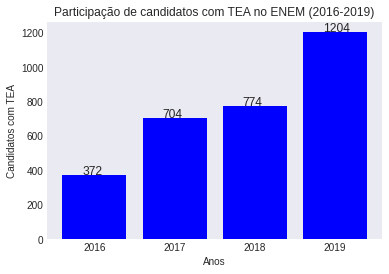

In [525]:
plt.style.use('seaborn-dark')

anos = [i for i in df.NU_ANO.unique()]
candidatos = [i for i in df.NU_ANO.value_counts(ascending=True)]

x_pos = np.arange(len(anos))

plt.bar(x_pos, candidatos, color='blue')
plt.xlabel("Anos")
plt.ylabel("Candidatos com TEA")
plt.title("Participação de candidatos com TEA no ENEM (2016-2019)")
plt.xticks(x_pos, x)
for index,data in enumerate(candidatos):
    plt.text(x=index-0.15 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.show()

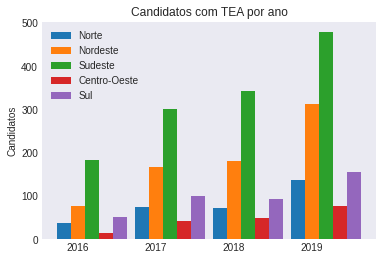


Candidatos por ano:
Norte		Nordeste	Sudeste		Centro-Oeste	Sul
2016 : 37	2016 : 77	2016 : 183	2016 : 14	2016 : 51
2017 : 74	2017 : 167	2017 : 302	2017 : 42	2017 : 100
2018 : 72	2018 : 180	2018 : 343	2018 : 50	2018 : 94
2019 : 137	2019 : 314	2019 : 479	2019 : 77	2019 : 155


In [659]:
#Relação de Candidatos por Região

regioes = {'Norte':['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], 'Nordeste':['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'], 
           'Sudeste':['ES', 'MG', 'RJ', 'SP'], 'Centro-Oeste':['GO', 'MT', 'MS'], 'Sul':['PR', 'SC', 'RS']}

norte= [len(df.loc[(df.NU_ANO == ano) & (df.SG_UF_RESIDENCIA.isin(regioes['Norte']))]) for ano in anos]
nordeste= [len(df.loc[(df.NU_ANO == ano) & (df.SG_UF_RESIDENCIA.isin(regioes['Nordeste']))]) for ano in anos]
sudeste= [len(df.loc[(df.NU_ANO == ano) & (df.SG_UF_RESIDENCIA.isin(regioes['Sudeste']))]) for ano in anos]
centro_oeste= [len(df.loc[(df.NU_ANO == ano) & (df.SG_UF_RESIDENCIA.isin(regioes['Centro-Oeste']))]) for ano in anos]
sul= [len(df.loc[(df.NU_ANO == ano) & (df.SG_UF_RESIDENCIA.isin(regioes['Sul']))]) for ano in anos]

ind = np.arange(len(anos)) 
width = 0.18
plt.bar(ind, norte, width, label='Norte')
plt.bar(ind + width, nordeste, width,label='Nordeste')
plt.bar(ind + width*2, sudeste, width, label='Sudeste')
plt.bar(ind + width*3, centro_oeste, width,label='Centro-Oeste')
plt.bar(ind + width*4, sul, width, label='Sul')

plt.ylabel('Candidatos')
plt.title('Candidatos com TEA por ano')
plt.xticks(ind + width,(anos))
plt.legend(loc='best')
plt.show()
print()
print("Candidatos por ano:")
print("Norte\t\tNordeste\tSudeste\t\tCentro-Oeste\tSul")
for indice, ano in enumerate(anos):
  print(f'{ano} : {norte[indice]}\t{ano} : {nordeste[indice]}\t{ano} : {sudeste[indice]}\t{ano} : {centro_oeste[indice]}\t{ano} : {sul[indice]}')

In [570]:
#Candidatos por faixa de renda



[37, 74, 72, 137]